# Neural Network Classification

## What we're going to cover

- Architecture of a neural network **classification** model
- Input shapes and output shapes of a **classification** model (features and labels)
- Create custom data to view and fit
- Steps in modelling
  - create a model, compiling a model, fitting a model, evaluating a model
- Different **classification** evaluation methods
- Saving and loading a model

In this book we're going to learn how to write neural network for classification problems. A classification is where you try to classify something as one or another. A few types of classifications problems:

- Binary classification
- Multiclass classification
- Multilabel classification


### Creating data to view and fit


In [1]:
# Neural Network Classification make 100 examples
from sklearn.datasets import make_circles
n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.3, random_state=42)


In [2]:
x, y[:10]

(array([[ 0.59171471,  0.43674853],
        [-0.45745002,  0.36160118],
        [-1.01069349,  0.83042101],
        ...,
        [-0.01985814, -1.02765007],
        [ 0.54269168, -1.11429774],
        [ 0.24539316,  1.01154823]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [3]:
import pandas as pd
circles = pd.DataFrame({'x0': x[:, 0], 'x1': x[:, 1], 'label': y})
circles

,x0,x1,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
...,...,...,...
995,0.312050,0.696566,0
996,-1.069302,-0.485523,0
997,-0.019858,-1.027650,1
998,0.542692,-1.114298,0


In [4]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

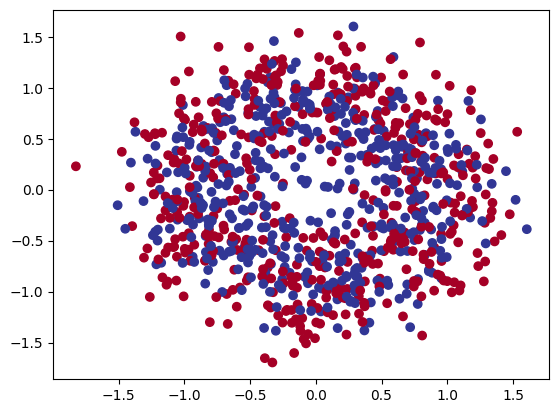

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

**Note**: Before pushing forward, spend 10-minute plyaing around with [playground tensorflow](https://playground.tensorflow.org/) building and runing different neural network. See what happen when you change different hyperparameters.

### Input and Output shapes


In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
import tensorflow as tf

### Steps in Modelling

1. create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate...


In [8]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

# fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 5.2403 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.6156 - accuracy: 0.4720
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 2.1002 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.5050
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5010


In [9]:
# Let's try and improve our model by training for longer...
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934647560119629, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50 accuracy.. it's performing as so, let's step things up a notch and add an extra layer.


In [10]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

# fit the model
model_2.fit(x, y, epochs=100, verbose=0)
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.1459 - accuracy: 0.5290


[7.145855903625488, 0.5289999842643738]

### Improving our model

Let's look into our bag of tricks to see how we can improve our model

Common ways to improve a deep model:

- Adding layers
- Increase the numbers of hidden units
- Change the activation functions
- Change the optimization function
- Chnage the learning rate
- Fitting on more data
- Fitting for longer

1. create a model - we weight to add more layers or increase the number of hidden units within a layer.
2. compiling a model - here we might to choose a different optimization function such as Adam


In [11]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# fit the model
model_3.fit(x, y, epochs=100, verbose=0)

# evaluate
model_3.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5060


[0.7130789756774902, 0.5059999823570251]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

- Take in a trained model, features (x) and labels (y)
- Create a meshgrid of the different x values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones (where each unique class falls)


In [12]:
import numpy as np


def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on x.
    This function was inpired by two resourse

    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # create x value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0] > 1):
        print(f'doing multiclass classification')

        # we have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print(f'doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing multiclass classification


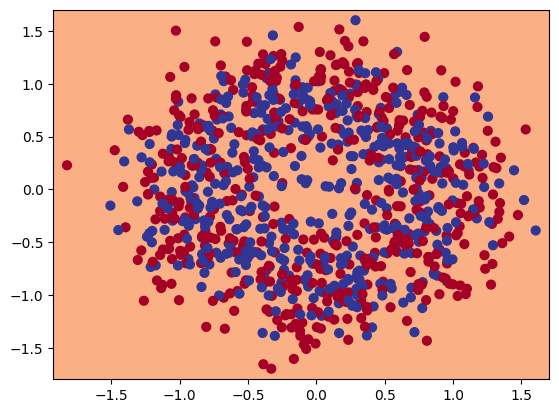

In [13]:
# check out the predictions our model is making
plot_decision_boundary(model=model_3, x=x, y=y)

In [28]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y = x + 100

# Split our regression data into training and test data
x_reg_train, x_reg_test = x_regression[:150], x_regression[150:]
y_reg_train, y_reg_test = y_regression[:150], y_regression[150:]

In [54]:
tf.size(x_reg_train), tf.size(x_reg_test), tf.size(x_regression)

(<tf.Tensor: shape=(), dtype=int32, numpy=150>,
 <tf.Tensor: shape=(), dtype=int32, numpy=50>,
 <tf.Tensor: shape=(), dtype=int32, numpy=200>)

Oh wait... we compiled our model for a binary classification problem. But we're now working on a regression problem, le's change the model to suit our data

In [56]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

# fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), tf.expand_dims(y_reg_train, axis=-1), epochs=100, verbose=0)

# evaluate
model_3.evaluate(tf.expand_dims(x_reg_train, axis=-1), tf.expand_dims(y_reg_train, axis=-1))

# x_reg_train.ndim, tf.expand_dims(x_reg_train, axis=-1).ndim

5/5 [==============================] - 0s 3ms/step - loss: 36.0755 - mae: 36.0755


[36.07551574707031, 36.07551574707031]

2/2 [==============================] - 0s 3ms/step


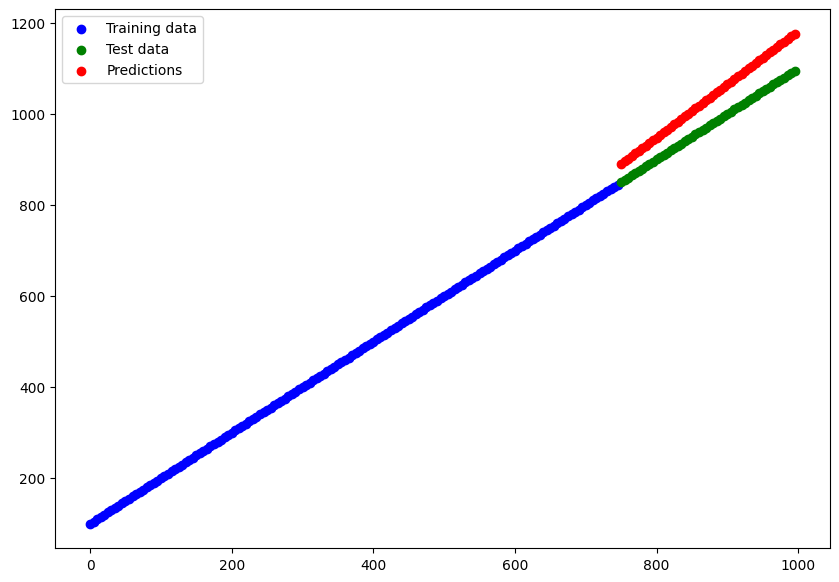

In [63]:
# Make prediction with our trained model
y_reg_pred = model_3.predict(tf.expand_dims(x_reg_test, axis=-1))

# plot the model's predictions agains our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_pred, c='r', label='Predictions')
plt.legend()

### The missing piece: Non-linearity